### 1) Environment preparation

In [1]:
# Import the required libraries and set plotting options
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(10,5)})

### 2) Import and explore data

#### 2.1) Report expectations:
- Load the files 'pageview_data_bookers.csv' and 'marketing_channel_timeseries'.
- Explore the data using the `info()`, `describe()`, `shape` and `value_counts()` methods, and note the observations regarding data types, number or records and features
- Identify missing data
- Filter/subset data
- Aggregate data (totals and by source)
- Note observations

#### 2.2) Load the data bookers and marketing respectivelymarketing

In [2]:
bookers = pd.read_csv("pageview_data_bookers.csv")
marketing = pd.read_csv("marketing_channel_timeseries.csv")

In [3]:
bookers.head(20)

,fullVisitorId,transactions,total_visitor_transactions,visitId,visitNumber,hitNumber,pagePath
0,6911334202687200,NaN,1,1500268117,1,1,home
1,6911334202687200,NaN,1,1500268117,1,2,home
2,6911334202687200,NaN,1,1500268117,1,3,home
3,6911334202687200,NaN,1,1500268117,1,4,google redesignapparelmens outerwearandroid me...
4,6911334202687200,NaN,1,1500268117,1,5,google redesignapparelwomen s google yoga jack...
5,6911334202687200,1.0,1,1500442011,2,1,home
6,6911334202687200,1.0,1,1500442011,2,2,home
7,6911334202687200,1.0,1,1500442011,2,3,asearch.html
8,6911334202687200,1.0,1,1500442011,2,4,asearch.htmlquickview
9,6911334202687200,1.0,1,1500442011,2,7,basket.html


In [4]:
marketing

,date_week,isMobile,source,medium,referralPath,region,visits,bounces,transactions,totalTransactionRevenue
0,25/06/2017,False,google,organic,NaN,California,24,4,1,"15,990,000"
1,25/06/2017,True,google,organic,NaN,California,37,15,0,-
2,25/06/2017,True,google,organic,NaN,Texas,12,6,0,-
3,25/06/2017,False,google,organic,NaN,New York,9,2,0,-
4,25/06/2017,False,(direct),(none),NaN,not available in demo dataset,32,10,0,-
...,...,...,...,...,...,...,...,...,...,...
1732,30/07/2017,False,(direct),(none),,Georgia,1,0,1,"16,590,000"
1733,30/07/2017,False,(direct),(none),NaN,Oregon,1,0,0,-
1734,30/07/2017,False,groups.google.com,referral,a google.com forum,California,4,2,0,-
1735,30/07/2017,False,youtube.com,referral,,not available in demo dataset,1,0,0,-


#### 2.3) Exploring datasets

In [5]:
bookers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36165 entries, 0 to 36164
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fullVisitorId               36165 non-null  uint64 
 1   transactions                25534 non-null  float64
 2   total_visitor_transactions  36165 non-null  int64  
 3   visitId                     36165 non-null  int64  
 4   visitNumber                 36165 non-null  int64  
 5   hitNumber                   36165 non-null  int64  
 6   pagePath                    36165 non-null  object 
dtypes: float64(1), int64(4), object(1), uint64(1)
memory usage: 1.9+ MB


In [6]:
bookers['fullVisitorId'] = bookers['fullVisitorId'].astype(int)

In [7]:
bookers.dtypes

fullVisitorId                   int32
transactions                  float64
total_visitor_transactions      int64
visitId                         int64
visitNumber                     int64
hitNumber                       int64
pagePath                       object
dtype: object

In [8]:
bookers.isna().sum()

fullVisitorId                     0
transactions                  10631
total_visitor_transactions        0
visitId                           0
visitNumber                       0
hitNumber                         0
pagePath                          0
dtype: int64

In [9]:
bookers.head()

,fullVisitorId,transactions,total_visitor_transactions,visitId,visitNumber,hitNumber,pagePath
0,1678982880,NaN,1,1500268117,1,1,home
1,1678982880,NaN,1,1500268117,1,2,home
2,1678982880,NaN,1,1500268117,1,3,home
3,1678982880,NaN,1,1500268117,1,4,google redesignapparelmens outerwearandroid me...
4,1678982880,NaN,1,1500268117,1,5,google redesignapparelwomen s google yoga jack...


In [10]:
bookers.describe()

,fullVisitorId,transactions,total_visitor_transactions,visitId,visitNumber,hitNumber
count,3.616500e+04,25534.000000,36165.000000,3.616500e+04,36165.000000,36165.000000
mean,4.271422e+07,1.069045,1.321195,1.500381e+09,4.346993,21.738255
std,1.252403e+09,0.324177,1.060380,6.832974e+05,8.836883,23.502751
min,-2.147181e+09,1.000000,1.000000,1.498893e+09,1.000000,1.000000
25%,-1.056235e+09,1.000000,1.000000,1.499876e+09,1.000000,6.000000
50%,7.456466e+07,1.000000,1.000000,1.500396e+09,2.000000,15.000000
75%,1.111630e+09,1.000000,1.000000,1.500962e+09,4.000000,29.000000
max,2.130882e+09,4.000000,9.000000,1.501567e+09,135.000000,259.000000


In [11]:
print(bookers.shape)
print(marketing.shape)

(36165, 7)
(1737, 10)


In [84]:
bookers_fcol=pd.read_csv("pageview_data_bookers.csv",
                         usecols=['fullVisitorId',
                                  'transactions',
                                  'pagePath'])
bookers_fcol.head()

,fullVisitorId,transactions,pagePath
0,6911334202687200,NaN,home
1,6911334202687200,NaN,home
2,6911334202687200,NaN,home
3,6911334202687200,NaN,google redesignapparelmens outerwearandroid me...
4,6911334202687200,NaN,google redesignapparelwomen s google yoga jack...


In [85]:
bookers_fcol.groupby(["pagePath"])[["transactions"]].sum().sort_values("transactions", 
                                                                            ascending=False)

,transactions
pagePath,
basket.html,4440.0
ordercompleted.html,2281.0
payment.html,2114.0
yourinfo.html,1847.0
signin.html,1267.0
...,...
google redesignofficewritingcolored pencil set.axd,0.0
google redesignofficewritingcolored pencil set.axddisney stor bags,0.0
google redesignapparelwomen s google yoga jacket sm.axd,0.0


In [88]:
book_fcol_group=bookers_fcol.groupby(["fullVisitorId",
                      "pagePath"])[["transactions"]].sum().sort_values("transactions", 
                                                                            ascending=False)
book_fcol_group

transactions
fullVisitorId       pagePath                                                        
9417857471295130000 basket.html                                                 87.0
5584411114546170000 basket.html                                                 46.0
1280993661204340000 basket.html                                                 45.0
47511660497565200   payment.html                                                44.0
4178948793864030000 basket.html                                                 40.0
...                                                                              ...
819296301112227000  google redesignapparel                                       0.0
7395718173947720000 google redesigndrinkwaremugs and cups                        0.0
                    google redesignbagstotesgoogle travels slim uti...           0.0
1973770164859100000 signin.html                                                  0.0
856273082667959000  google redesignlifestylefungoogle kick ball.axd              0.0

[17202 rows x 1 columns]

In [89]:
book_fcol_group.to_csv('C:/Users/Cynthia/Documents/Datasets/book_fcol_group.csv')   

In [15]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737 entries, 0 to 1736
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   date_week                  1737 non-null   object
 1   isMobile                   1737 non-null   bool  
 2   source                     1737 non-null   object
 3   medium                     1737 non-null   object
 4   referralPath               1014 non-null   object
 5   region                     1737 non-null   object
 6   visits                     1737 non-null   int64 
 7   bounces                    1737 non-null   int64 
 8   transactions               1737 non-null   int64 
 9    totalTransactionRevenue   1737 non-null   object
dtypes: bool(1), int64(3), object(6)
memory usage: 124.0+ KB


In [16]:
# Fix the date column data type
marketing['date_week'] = pd.to_datetime(marketing['date_week'])

In [17]:
marketing.dtypes

date_week                    datetime64[ns]
isMobile                               bool
source                               object
medium                               object
referralPath                         object
region                               object
visits                                int64
bounces                               int64
transactions                          int64
 totalTransactionRevenue             object
dtype: object

In [18]:
marketing.isna().sum()

date_week                      0
isMobile                       0
source                         0
medium                         0
referralPath                 723
region                         0
visits                         0
bounces                        0
transactions                   0
 totalTransactionRevenue       0
dtype: int64

In [19]:
marketing.head()

,date_week,isMobile,source,medium,referralPath,region,visits,bounces,transactions,totalTransactionRevenue
0,2017-06-25,False,google,organic,NaN,California,24,4,1,"15,990,000"
1,2017-06-25,True,google,organic,NaN,California,37,15,0,-
2,2017-06-25,True,google,organic,NaN,Texas,12,6,0,-
3,2017-06-25,False,google,organic,NaN,New York,9,2,0,-
4,2017-06-25,False,(direct),(none),NaN,not available in demo dataset,32,10,0,-


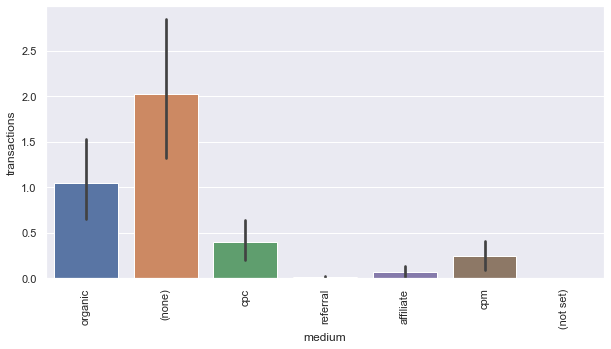

In [92]:
sns.barplot(x="medium", y="transactions", data=marketing)

total = len(marketing["medium"])
plt.xticks(rotation=90)
plt.show()

In [20]:
marketing.describe()

,visits,bounces,transactions
count,1737.000000,1737.000000,1737.000000
mean,18.812320,7.453080,0.592401
std,87.726188,34.395976,3.573409
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000
75%,6.000000,3.000000,0.000000
max,1087.000000,517.000000,71.000000


In [21]:
# Filter/subset data
mark_fcol = pd.read_csv("marketing_channel_timeseries.csv", 
                            usecols=['source',
                                     'medium', 
                                     'referralPath',
                                     'visits',
                                     'bounces',
                                     'transactions'])
mark_fcol.head()

,source,medium,referralPath,visits,bounces,transactions
0,google,organic,NaN,24,4,1
1,google,organic,NaN,37,15,0
2,google,organic,NaN,12,6,0
3,google,organic,NaN,9,2,0
4,(direct),(none),NaN,32,10,0


In [22]:
mark_fcol['transactions'].astype(int)

0       1
1       0
2       0
3       0
4       0
       ..
1732    1
1733    0
1734    0
1735    0
1736    0
Name: transactions, Length: 1737, dtype: int32

In [24]:
mrkng=mark_fcol.groupby(["source","referralPath"])[["transactions", "visits"]].sum().sort_values("transactions", 
                                                                            ascending=False)
mrkng

transactions  \
source             referralPath                                                       
(direct)                                                                        516   
                    offer 2145                                                    6   
sites.google.com    a google.com googletopia discounts-deals-and-f...             3   
mail.google.com     mail u 0                                                      2   
sites.google.com    corp google.com google-merchandise-store faqs                 2   
...                                                                             ...   
search.tb.ask.com   search GGmain.jhtml                                           0   
search.xfinity.com                                                                0   
sites.google.com    a buffaloseminary.org 2015-summer-orientation ...             0   
                    a google.com analyticsdemo                                    0   
youtube.com         yt advertise index-new.html                                   0   

                                                                       visits  
source             referralPath                                                
(direct)                                                                 5370  
                    offer 2145                                            282  
sites.google.com    a google.com googletopia discounts-deals-and-f...     127  
mail.google.com     mail u 0                                               60  
sites.google.com    corp google.com google-merchandise-store faqs          16  
...                                                                       ...  
search.tb.ask.com   search GGmain.jhtml                                     1  
search.xfinity.com                                                          6  
sites.google.com    a buffaloseminary.org 2015-summer-orientation ...       1  
                    a google.com analyticsdemo                              1  
youtube.com         yt advertise index-new.html                             1  

[247 rows x 2 columns]

In [25]:
mrkng = mark_fcol.groupby(["source"])[["referralPath","transactions","visits"]].sum().sort_values("transactions", 
                                                                            ascending=False)
mrkng.head()

,transactions,visits
source,,
(direct),665,12487
google,336,16575
sites.google.com,7,213
dfa,5,270
Partners,4,395


In [26]:
bookers_plot=bookers_fcol.groupby(["pagePath"])[["total_visitor_transactions"]].sum().sort_values("total_visitor_transactions", 
                                                                            ascending=False)
bookers_plot.reset_index(inplace=True)
bookers_plot.head()

,pagePath,total_visitor_transactions
0,basket.html,6729
1,home,2861
2,ordercompleted.html,2758
3,payment.html,2752
4,yourinfo.html,2484


In [27]:
#How does bounce rate vary by marketing channel (source & medium)? Are the differences significant?
bounces= mark_fcol.groupby(["source","medium"])[["visits","bounces"]].sum().sort_values("bounces",
                                                                            ascending=False)
bounces

,,visits,bounces
source,medium,,
google,organic,14343,5776
(direct),(none),12486,4460
youtube.com,referral,1495,904
google,cpc,1849,677
Partners,affiliate,395,189
...,...,...,...
earth.google.com,referral,1,0
search.tb.ask.com,referral,1,0
newclasses.nyu.edu,referral,1,0


## 3) Data analysis

### 3.1) Which marketing source delivers the most bookings?

In [144]:
mark_fcol.sort_values("transactions",ascending=False)

,source,medium,referralPath,visits,bounces,transactions
1086,(direct),(none),,967,169,71
571,(direct),(none),,837,134,70
1341,(direct),(none),,869,149,55
562,google,organic,NaN,1004,359,33
332,(direct),(none),,444,61,31
...,...,...,...,...,...,...
601,optimize.google.com,referral,optimize opt-launch.html,3,0,0
600,Partners,affiliate,NaN,3,2,0
599,sites.google.com,referral,a google.com googletopia discounts-deals-and-...,1,0,0
598,(direct),(none),offer 2145,1,0,0


In [148]:
# reset index to have source as column
mrkng1= mark_fcol.groupby(["source","medium"])[["transactions","visits","referralPath"]].sum().sort_values("transactions",
                                                                                               ascending=False)
mrkng1.reset_index(inplace=True)

mrkng1

,source,medium,transactions,visits
0,(direct),(none),665,12486
1,google,organic,273,14343
2,google,cpc,47,1849
3,google,cpm,16,382
4,sites.google.com,referral,7,213
...,...,...,...,...
57,lunametrics.com,referral,0,2
58,m.baidu.com,referral,0,1
59,arstechnica.com,referral,0,1
60,m.youtube.com,referral,0,14


In [149]:
# reset index to have source as column
mrkng2= mark_fcol.groupby(["source","medium","referralPath"])[["transactions","visits"]].sum().sort_values("transactions",
                                                                                               ascending=False)
mrkng2.reset_index(inplace=True)

mrkng2

,source,medium,referralPath,transactions,visits
0,(direct),(none),,516,5370
1,(direct),(none),offer 2145,6,282
2,sites.google.com,referral,a google.com googletopia discounts-deals-and-...,3,127
3,mail.google.com,referral,mail u 0,2,60
4,sites.google.com,referral,corp google.com google-merchandise-store faqs,2,16
...,...,...,...,...,...
242,search.tb.ask.com,referral,search GGmain.jhtml,0,1
243,search.xfinity.com,referral,,0,6
244,sites.google.com,referral,a buffaloseminary.org 2015-summer-orientation...,0,1
245,sites.google.com,referral,a google.com analyticsdemo,0,1


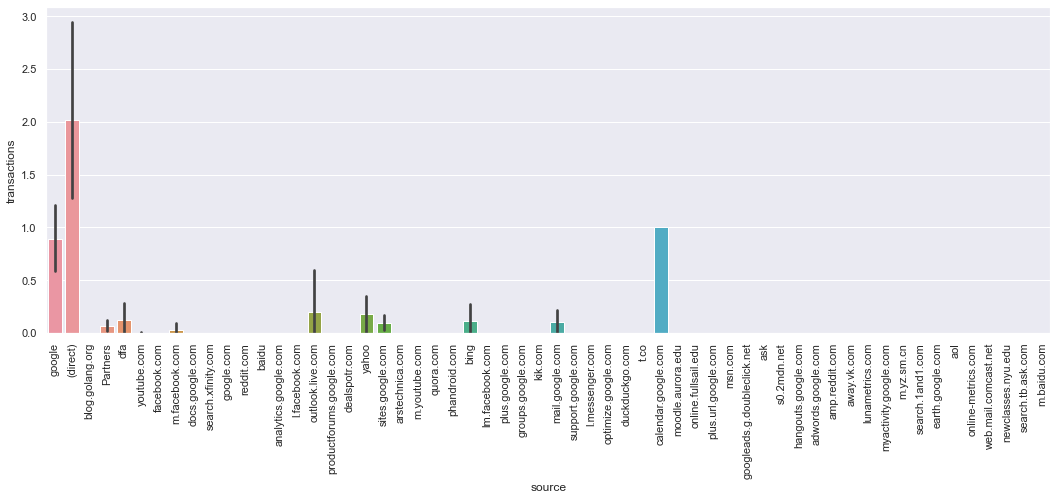

In [145]:
plt.figure(figsize=(18, 6))
sns.barplot(x="source", y="transactions", data=mark_fcol)

plt.xticks(rotation=90)
plt.show()

### 3.2) How does bounce rate vary by marketing channel (source & medium)? Are the differences significant?

In [30]:
bounce_rate=bounces.assign(bounce_rate=(bounces['bounces']) / bounces['visits'])*(100)
bounce_rate.head(50)

,,visits,bounces,bounce_rate
source,medium,,,
google,organic,1434300,577600,40.270515
(direct),(none),1248600,446000,35.720006
youtube.com,referral,149500,90400,60.468227
google,cpc,184900,67700,36.614386
Partners,affiliate,39500,18900,47.848101
analytics.google.com,referral,24600,15300,62.195122
m.facebook.com,referral,23900,14200,59.414226
google,cpm,38200,14100,36.910995
dfa,cpm,27000,11600,42.962963


In [105]:
df_br=bounce_rate.reset_index()
df_br.head()

,source,medium,visits,bounces,bounce_rate
0,google,organic,1434300,577600,40.270515
1,(direct),(none),1248600,446000,35.720006
2,youtube.com,referral,149500,90400,60.468227
3,google,cpc,184900,67700,36.614386
4,Partners,affiliate,39500,18900,47.848101


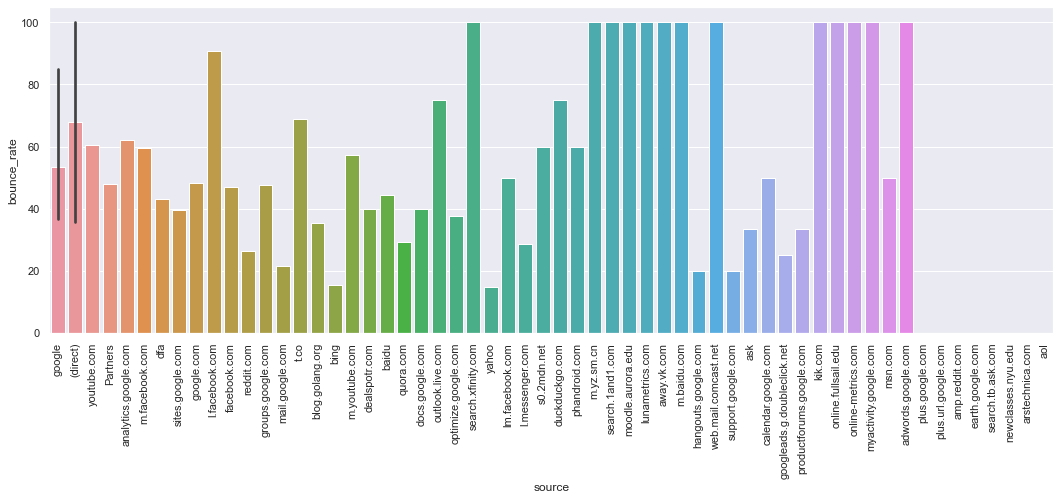

In [109]:
plt.figure(figsize=(18, 6))
sns.barplot(x="source", y="bounce_rate", data=df_br)

plt.xticks(rotation=90)
plt.show()

### 3.3) Which factors most strongly influence conversion rate (transactions / visit)

In [154]:
conv_rate = mark_fcol.assign(conv_rate=(mark_fcol['transactions'])/ mark_fcol['visits'])*(100)
conv_rate.head(15)

,source,medium,referralPath,visits,bounces,transactions,conv_rate
0,googlegooglegooglegooglegooglegooglegooglegoog...,organicorganicorganicorganicorganicorganicorga...,NaN,2400,400,100,4.166667
1,googlegooglegooglegooglegooglegooglegooglegoog...,organicorganicorganicorganicorganicorganicorga...,NaN,3700,1500,0,0.000000
2,googlegooglegooglegooglegooglegooglegooglegoog...,organicorganicorganicorganicorganicorganicorga...,NaN,1200,600,0,0.000000
3,googlegooglegooglegooglegooglegooglegooglegoog...,organicorganicorganicorganicorganicorganicorga...,NaN,900,200,0,0.000000
4,(direct)(direct)(direct)(direct)(direct)(direc...,(none)(none)(none)(none)(none)(none)(none)(non...,NaN,3200,1000,0,0.000000
5,googlegooglegooglegooglegooglegooglegooglegoog...,cpccpccpccpccpccpccpccpccpccpccpccpccpccpccpcc...,NaN,2400,1300,0,0.000000
6,googlegooglegooglegooglegooglegooglegooglegoog...,cpccpccpccpccpccpccpccpccpccpccpccpccpccpccpcc...,NaN,400,200,0,0.000000
7,googlegooglegooglegooglegooglegooglegooglegoog...,cpccpccpccpccpccpccpccpccpccpccpccpccpccpccpcc...,NaN,4000,1900,0,0.000000
8,(direct)(direct)(direct)(direct)(direct)(direc...,(none)(none)(none)(none)(none)(none)(none)(non...,...,600,100,0,0.000000
9,blog.golang.orgblog.golang.orgblog.golang.orgb...,referralreferralreferralreferralreferralreferr...,gopher gopher gopher gopher gopher gopher gop...,100,100,0,0.000000


### 3.4) How complex are the paths a user takes to make a booking?

In [51]:
bookers.head(10)

,fullVisitorId,transactions,total_visitor_transactions,visitId,visitNumber,hitNumber,pagePath
0,1678982880,NaN,1,1500268117,1,1,home
1,1678982880,NaN,1,1500268117,1,2,home
2,1678982880,NaN,1,1500268117,1,3,home
3,1678982880,NaN,1,1500268117,1,4,google redesignapparelmens outerwearandroid me...
4,1678982880,NaN,1,1500268117,1,5,google redesignapparelwomen s google yoga jack...
5,1678982880,1.0,1,1500442011,2,1,home
6,1678982880,1.0,1,1500442011,2,2,home
7,1678982880,1.0,1,1500442011,2,3,asearch.html
8,1678982880,1.0,1,1500442011,2,4,asearch.htmlquickview
9,1678982880,1.0,1,1500442011,2,7,basket.html


In [59]:
# Unique user's session (fullVisitorId combined with visitId) with path taken by unique users and transaction total of each user

path_compl=bookers.groupby(["fullVisitorId",
                                 "visitId","pagePath"])[["transactions",
                                              ]].sum().sort_values("transactions", 
                                                                            ascending=True)
path_compl.head(20)

transactions
fullVisitorId visitId    pagePath                                                        
 2130882416   1499453615 google redesignapparelmensmens t shirts                      0.0
 922315376    1499282022 basket.html                                                  0.0
                         google redesignapparelmens                                   0.0
                         google redesignapparelmensmens t shirts                      0.0
                         google redesignapparelwomens                                 0.0
                         home                                                         0.0
                         ordercompleted.html                                          0.0
                         payment.html                                                 0.0
                         revieworder.html                                             0.0
                         signin.html                                                  0.0
                         yourinfo.html                                                0.0
              1499443590 home                                                         0.0
-819487056    1500954142 home                                                         0.0
                         google redesignapparelmens                                   0.0
                         google redesignapparel                                       0.0
              1500354251 basket.html                                                  0.0
              1500349309 home                                                         0.0
                         google redesignapparelmens                                   0.0
                         google redesignapparelmen s t shirtsgoogle mens...           0.0
                         google redesignaccessoriespetcrunch noise dog t...           0.0

In [69]:
path_compl.to_csv('C:/Users/Cynthia/Documents/Datasets\path_compl.csv')           

In [34]:
path_compl.describe()

,transactions
count,21810.000000
mean,1.251582
std,1.862884
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,44.000000


<AxesSubplot:xlabel='transactions', ylabel='count'>

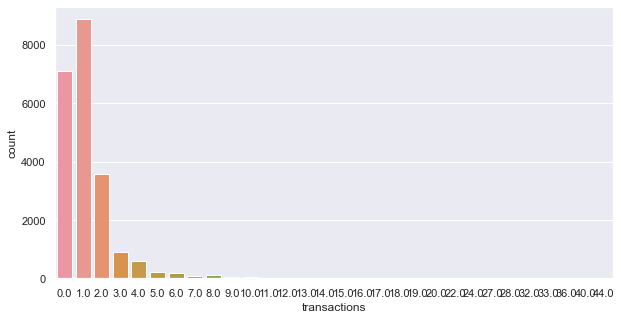

In [35]:
sns.countplot(x="transactions", data=path_compl)

In [36]:
counts = path_compl.value_counts()
counts.head(10)

transactions
1.0             8865
0.0             7116
2.0             3564
3.0              915
4.0              596
5.0              201
6.0              177
8.0              115
7.0               68
9.0               40
dtype: int64

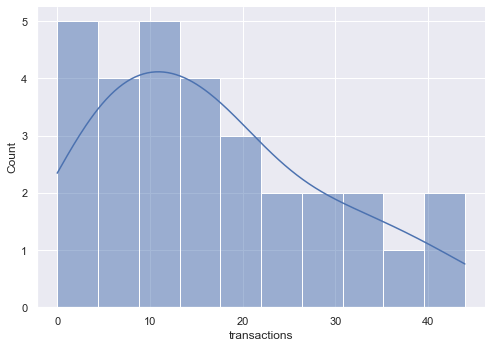

In [37]:
ax = sns.displot(data=counts, x="transactions", bins=10, kind='hist', 
                 palette='GnBu', aspect=1.4, kde=True)

plt.show()

In [38]:
counts_df = counts.to_frame(name="counts")
counts_df = counts_df.rename_axis('transactions').reset_index()
counts_df 

,transactions,counts
0,1.0,8865
1,0.0,7116
2,2.0,3564
3,3.0,915
4,4.0,596
5,5.0,201
6,6.0,177
7,8.0,115
8,7.0,68
9,9.0,40


In [39]:
# Unique user's session (fullVisitorId combined with visitId) with path taken by unique users, 
# and hitNumber total for each user

path_compl2=bookers.groupby(["fullVisitorId",
                                 "visitId","pagePath"])[["hitNumber",
                                              ]].sum().sort_values("hitNumber", 
                                                                            ascending=True)
path_compl2.head(20)

hitNumber
fullVisitorId visitId    pagePath                                                     
 2130882416   1499453615 google redesignapparelmensmens t shirts                     1
 633550816    1501365112 home                                                        1
              1501361800 google redesignapparel                                      1
 1224483440   1501524729 home                                                        1
-1376161344   1501531274 google redesignshop by brandyoutube                         1
              1501534100 google redesignshop by brandyoutube                         1
              1501548433 google redesignshop by brandyoutube                         1
 308721368    1501095490 home                                                        1
-1372656336   1500901981 google redesignapparelwomens tshirtswomens hero...          1
              1501525669 google redesignapparelmen s t shirtsgoogle mens...          1
              1501529032 google redesignapparelmensmens t shirts                     1
 633550816    1500656693 google redesignapparel                                      1
 1819244768   1499351897 google redesignapparelmen s t shirtsandroid men...          1
              1499211319 home                                                        1
 1231776      1501056289 signin.html                                                 1
              1501010810 signin.html                                                 1
 632354304    1499291469 home                                                        1
 1231776      1500529055 signin.html                                                 1
 637864256    1499471381 google redesignofficestickersgoogle doodle deca...          1
 1818091264   1499468271 signin.html                                                 1

In [70]:
path_compl2.to_csv('C:/Users/Cynthia/Documents/Datasets/path_compl2.csv')        

In [40]:
counts2 = path_compl2.value_counts()
counts2.head(10)

hitNumber
1            1576
3            1279
2            1029
4             764
6             656
5             621
7             566
8             555
9             512
10            505
dtype: int64

In [41]:
# Unique user's session (fullVisitorId combined with visitId) with path taken by unique users, 
# transaction and hitNumber total of each user

path_compl3=bookers.groupby(["fullVisitorId",
                                 "visitId","pagePath"])[["transactions","hitNumber",
                                              ]].sum().sort_values("transactions", 
                                                                            ascending=True)
path_compl3.head(20)

transactions  \
fullVisitorId visitId    pagePath                                                           
 2130882416   1499453615 google redesignapparelmensmens t shirts                      0.0   
 922315376    1499282022 basket.html                                                  0.0   
                         google redesignapparelmens                                   0.0   
                         google redesignapparelmensmens t shirts                      0.0   
                         google redesignapparelwomens                                 0.0   
                         home                                                         0.0   
                         ordercompleted.html                                          0.0   
                         payment.html                                                 0.0   
                         revieworder.html                                             0.0   
                         signin.html                                                  0.0   
                         yourinfo.html                                                0.0   
              1499443590 home                                                         0.0   
-819487056    1500954142 home                                                         0.0   
                         google redesignapparelmens                                   0.0   
                         google redesignapparel                                       0.0   
              1500354251 basket.html                                                  0.0   
              1500349309 home                                                         0.0   
                         google redesignapparelmens                                   0.0   
                         google redesignapparelmen s t shirtsgoogle mens...           0.0   
                         google redesignaccessoriespetcrunch noise dog t...           0.0   

                                                                             hitNumber  
fullVisitorId visitId    pagePath                                                       
 2130882416   1499453615 google redesignapparelmensmens t shirts                     1  
 922315376    1499282022 basket.html                                                77  
                         google redesignapparelmens                                  3  
                         google redesignapparelmensmens t shirts                    22  
                         google redesignapparelwomens                                5  
                         home                                                        1  
                         ordercompleted.html                                        32  
                         payment.html                                               28  
                         revieworder.html                                           30  
                         signin.html                                                39  
                         yourinfo.html                                              26  
              1499443590 home                                                        1  
-819487056    1500954142 home                                                        3  
                         google redesignapparelmens                                 14  
                         google redesignapparel                                      4  
              1500354251 basket.html                                                 1  
              1500349309 home                                                        3  
                         google redesignapparelmens                                 11  
                         google redesignapparelmen s t shirtsgoogle mens...          3  
                         google redesignaccessoriespetcrunch noise dog t...          8

In [71]:
path_compl3.to_csv('C:/Users/Cynthia/Documents/Datasets\path_compl3.csv')        

In [42]:
counts3 = path_compl3.value_counts()
counts3.head(10)

transactions  hitNumber
0.0           1            1050
              3             724
              2             639
1.0           1             511
              3             409
0.0           4             402
1.0           2             377
0.0           6             334
1.0           4             329
0.0           5             323
dtype: int64

In [53]:
counts_df2= counts3.to_frame(name="Total")
counts_df2= counts3.reset_index()
counts_df2.head(20)

,transactions,hitNumber,0
0,0.0,1,1050
1,0.0,3,724
2,0.0,2,639
3,1.0,1,511
4,1.0,3,409
5,0.0,4,402
6,1.0,2,377
7,0.0,6,334
8,1.0,4,329
9,0.0,5,323


In [44]:
counts_df2 = pd.DataFrame(counts_df2)
counts_df2.columns = ["transactions", "hitNumber", "total"]

counts_df2

,transactions,hitNumber,total
0,0.0,1,1050
1,0.0,3,724
2,0.0,2,639
3,1.0,1,511
4,1.0,3,409
...,...,...,...
1599,4.0,240,1
1600,4.0,241,1
1601,4.0,248,1
1602,4.0,256,1


<AxesSubplot:xlabel='transactions', ylabel='count'>

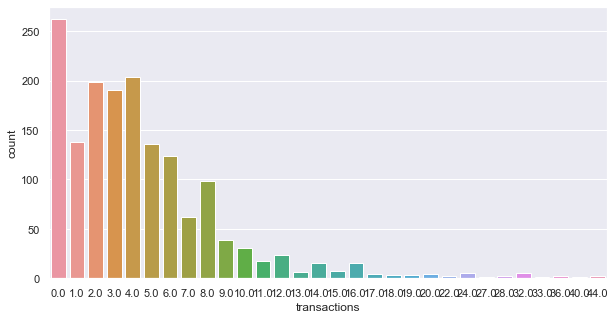

In [45]:
sns.countplot(x="transactions", data=counts_df2)

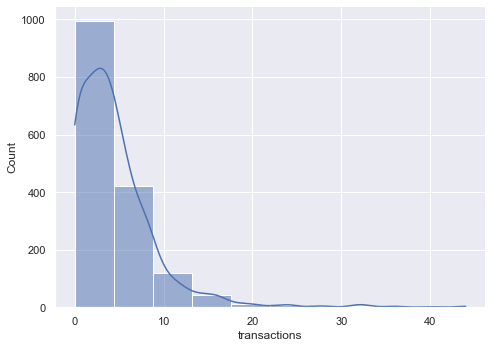

In [46]:
ax = sns.displot(data=counts_df2, x="transactions", bins=10, kind='hist', 
                 palette='GnBu', aspect=1.4, kde=True)

plt.show()

In [75]:
# Unique user's session (fullVisitorId combined with visitId) with path taken by unique users, 
# transaction and hitNumber total of each user

path_compl4=bookers.groupby(["fullVisitorId",
                                 "visitId","pagePath","transactions"])[["hitNumber",
                                              ]].sum().sort_values("hitNumber",
                                                                            ascending=True)
path_compl4.head(20)

,,,,hitNumber
fullVisitorId,visitId,pagePath,transactions,
277424624,1500559669,home,1.0,1
2106917840,1499535262,google redesignapparelmensmens t shirts,1.0,1
1474378992,1499276277,home,1.0,1
-1447812256,1501196835,home,1.0,1
-1443712240,1499476144,home,1.0,1
933727872,1500613900,home,1.0,1
-1439431392,1501104345,home,1.0,1
-1774990592,1500499073,google redesignshop by brandyoutube,1.0,1
1964444128,1500319524,home,1.0,1


In [82]:
# Unique user's session (fullVisitorId combined with visitId) with path taken totals

path_compl5=bookers.groupby(["fullVisitorId",
                                 "visitId"])[["pagePath"
                                              ]].sum().sort_values("pagePath", 
                                                                            ascending=True)
path_compl5.head(10)

,,pagePath
fullVisitorId,visitId,
1154193728,1500002479,asearch.htmlasearch.htmlquickviewbasket.htmlsi...
2058804496,1498931421,asearch.htmlasearch.htmlquickviewgoogle redesi...
-1132177584,1500485087,asearch.htmlasearch.htmlquickviewgoogle redesi...
1717835888,1499445123,asearch.htmlasearch.htmlquickviewgoogle redesi...
-867528432,1499393224,asearch.htmlgoogle redesignofficestickersgoogl...
-810447392,1501307431,asearch.htmlsignin.htmlstore.htmlgoogle redesi...
1814270880,1500480488,basket.html
1953560080,1501025207,basket.html
-2107494720,1499119219,basket.html


In [77]:
# Total count of path performed by unique users

counts5 = path_compl5.value_counts()
counts5.head(10)

pagePath                                                                                              
home                                                                                                      91
signin.html                                                                                               71
signin.htmlmyaccount.html?mode=viewordermyaccount.html?mode=vieworderdetail                               69
basket.html                                                                                               25
homehome                                                                                                  23
google redesignapparelmensmens t shirts                                                                   21
signin.htmlmyaccount.html?mode=vieworder                                                                  21
google redesignbags                                                                                       13
homemyaccount.html?mode=b

In [78]:
counts_df5 = pd.DataFrame(counts5)
counts_df5= counts5.reset_index()
counts_df5.columns = ["pagePath", "total"]
counts_df5

,pagePath,total
0,home,91
1,signin.html,71
2,signin.htmlmyaccount.html?mode=viewordermyacco...,69
3,basket.html,25
4,homehome,23
...,...,...
1956,homebasket.htmlsignin.htmlbasket.htmlyourinfo....,1
1957,homebasket.htmlsignin.htmlbasket.htmlgoogle re...,1
1958,homebasket.htmlsignin.htmlbasket.htmlgoogle re...,1
1959,homebasket.htmlmyaccount.html?mode=billingaddr...,1


In [79]:
counts_df5.describe()

,total
count,1961.000000
mean,1.244263
std,3.215714
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,91.000000
